Седых Иван БПМ181

In [1]:
import math
import random

import numpy as np
import sympy as sym
from matplotlib import pyplot as plt
import scipy.stats as stats
import tqdm


plt.style.use('ggplot')

---
## Task 1

In [15]:
# посчитаем символьно
def caluclate_integral_symbolic(n, alpha_val):
    x, alpha = sym.symbols('x alpha')
    int_func = x**n / (x + alpha)
    res = sym.integrate(int_func, (x, 0, 1)).evalf(subs={alpha : alpha_val})
    return float(res)


print(f"I_25(0.1) = {caluclate_integral_symbolic(25, 0.1)}")
print(f"I_25(10) = {caluclate_integral_symbolic(25, 10)}")

I_25(0.1) = 0.03622697090911682
I_25(10) = 0.0035083534096819772


$$
I_n(\alpha) = \int_0^1{\frac{x^n}{x+\alpha}} \,dx \\
I_n(\alpha) = -\alpha I_{n-1}(\alpha) + \frac 1 n \\
I_0(\alpha) = \ln(1+\alpha) - \ln(\alpha)
$$

In [86]:
# прямая рекурсия
def calculate_integral_forward(max_n, alpha):
    res = math.log(1 + alpha) - math.log(alpha)
    for n in range(1, max_n + 1):
        res = -alpha * res + 1/n
    return res


print(f"I_25(0.1) = {calculate_integral_forward(25, 0.1)}")
print(f"I_25(10) = {calculate_integral_forward(25, 10)}")

I_25(0.1) = 0.03622697090911682
I_25(10) = 916988169.5363449


Первый интеграл посчитался верно (даже сходится с wolfram alpha).   
Со вторым беда, ибо интеграл ограничен сверху единицей, а мы получили очень много (да и вольфрам считает иначе).  
Так произошло, потому что на каждом шаге мы увеличивали ошибку в $10$ раз (мы копим ошибки), умножая предыдущий результат на $\alpha$, а в первом интеграле ошибка уменьшалась.

Посчитаем обратной рекурсией.  
$$
I_{n-1}(\alpha)=\frac{\frac 1 n -I_n(\alpha)}{\alpha}
$$
$$
\lim_{n \to \infty} I_n(\alpha) = 0
$$
поэтому предположим что мы знаем, что $I_{500}(\alpha) = 0$ -- это будет базой рекурсии.

In [85]:
# обратная рекурсия
def calculate_integral_backward(n, alpha):
    res = 0
    for n in range(500, n, -1):
        res = (1/n - res) / alpha
    return res


print(f"I_25(0.1) = {calculate_integral_backward(25, 0.1)}")
print(f"I_25(10) = {calculate_integral_backward(25, 10)}")

I_25(0.1) = inf
I_25(10) = 0.0035083534096819772


Ух ты, стрелочка повернулась, теперь первый интеграл не считаеся, а второй считается верно (совпадает с вольфрамом).  
При вычислении первого интеграла ошибка на каждой итерации делится на $0.1$ (увеличивается в $10$ раз), а при вычислении второго уменьшается.

---
## Task 2

In [19]:
def recur(n, a0=1, a1=2):
    if n == 0:
        return a0
    if n == 1:
        return a1
    return -recur(n - 1) + 6 * recur(n - 2)

# перепишем как дп чтобы считать за O(n) времени и O(1) памяти
def recur_fast(n, a0=1, a1=2):
    if n == 0:
        return a0
    if n == 1:
        return a1
    prev = a0
    cur = a1
    for _ in range(1, n):
        prev, cur = cur, -cur + 6*prev
    return cur

Для первого вызова:
$$
a_n = 2^n
$$

In [22]:
# проверим, что я вывел формулу верно
recur_fast(2021) == 2**2021

True

Во втором случае:
$$
a_n = \left(1+ \frac \epsilon 5\right) * 2^n + \left(- \frac \epsilon 5 \right)*(-3)^n
$$
Видно что теперь есть новое экспоненциальное слагаемое с большим основанием

In [53]:
# увидим переполнение (float может переполниться)
eps = 1e-6
recur_fast(2021, a1=2+eps)

inf

In [71]:
# увидим, что вторая последовательность сильно больше первой
n = 250
print(f"{recur_fast(n, a1=2):.3e}")
print(f"{recur_fast(n, a1=2+eps):.3e}")

1.809e+75
-3.814e+112


---
## Task 4

In [58]:
import math
def round_to_n(x, n=4):
    if x == 0:
        return x
    else:
        return round(x, -int(math.floor(math.log10(abs(x)))) + (n - 1))

In [33]:
# убедились
print(round_to_n(0.123467))
print(round_to_n(0.123447))

0.1235
0.1234


In [32]:
res = 0
for k in range(1, 3001):
    res = round_to_n(res + 1/k**2, 4)
res

1.624

In [75]:
# посмотрим на члены ряда
for k in range(1, 140, 15):
    print(f"k={k:3d}: {round_to_n(1/k**2, 4)}")

k=  1: 1.0
k= 16: 0.003906
k= 31: 0.001041
k= 46: 0.0004726
k= 61: 0.0002687
k= 76: 0.0001731
k= 91: 0.0001208
k=106: 8.9e-05
k=121: 6.83e-05
k=136: 5.407e-05


Ошибка появляется от того, что первые члена ряда сильно больше чем члены в конце, и прибавления последних членов ряда не достаточно чтобы изменить последнюю значущую цифру. Чтобы этого избежать, можно начать суммирование с меньших членов.

In [55]:
# получим верный результат изменив порядок суммирования
res = 0
for k in range(3000, 0, -1):
    res = round_to_n(res + 1/k**2, 4)
res

1.645

---
## Task 5

### (a)

In [205]:
def get_F(M1, M2, r, G=6.67430e-11):
    return (G * M1 * M2) / r**2

G, M_1, M_2, r = sym.symbols('G M_1 M_2 r', real=True)
F = get_F(M_1, M_2, r, G=G)
F

G*M_1*M_2/r**2

In [206]:
# выведем формулу для рассчета ошибки
delta_M_1, delta_M_2, delta_r = sym.symbols('Delta_M_1 Delta_M_2 Delta_r', real=True)
# delta_F = abs(F.diff(M_1)) * delta_M_1 + abs(F.diff(M_2)) * delta_M_2 + abs(F.diff(r)) * delta_r # это плохая оценка
delta_F = abs(F) * sym.sqrt((delta_M_1/M_1)**2 + (delta_M_2/M_2)**2 + 4 * (delta_r/r)**2)
delta_F

sqrt(Delta_M_1**2/M_1**2 + Delta_M_2**2/M_2**2 + 4*Delta_r**2/r**2)*Abs(G*M_1*M_2/r**2)

[formulaes wiki](https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulae)

В принципе тут все просто по формулам умножения ошибки. Разве что неочевидно откуда $4$ в последнем слагаемом -- оно появляется потому что при подсчете $\sigma_{r^2}$ корреляция $r$ с самим собой равна $1$ и это слагамое не обнуляется

$$
f = AB \qquad \sigma_f \approx \left| f \right| \sqrt{ \left(\frac{\sigma_A}{A}\right)^2 + \left(\frac{\sigma_B}{B}\right)^2 + 2\frac{\sigma_{AB}}{AB} } \\
f = rr \qquad \sigma_f \approx \left| f \right| \sqrt{ 2\left(\frac{\sigma_r}{r}\right)^2 +  2\frac{\sigma_{rr}}{rr} } = 
\left| f \right|  \sqrt{ 2\left(\frac{\sigma_r}{r}\right)^2 +  2\left(\frac{\sigma_r}{r}\right)^2 } = 
\left| f \right|  \sqrt{ 4\left(\frac{\sigma_r}{r}\right)^2  }
$$

In [207]:
values = {
    G  :       6.67430e-11,
    M_1:       40e4,
    delta_M_1: 0.05e4,
    M_2:       30e4,
    delta_M_2: 0.1e4,
    r  :       3.2,
    delta_r :  0.01
}

# посчитаем значаение F
F_value = F.evalf(subs=values)
F_value = round_to_n(float(F_value))

# посчитаем значаение погрешности F
delta_F_value = delta_F.evalf(subs=values)
delta_F_value = round_to_n(float(delta_F_value), 2)
delta_F_value

# в результате имеем
f'F = {F_value} ± {delta_F_value}'

'F = 0.7821 ± 0.0056'

### (b)

In [208]:
def get_gauss_sample(mu, sigma, n=int(1e5)):
    return [random.gauss(mu, sigma) for _ in range(n)]

M1_sample = get_gauss_sample(mu=values[M_1], sigma=values[delta_M_1])
M2_sample = get_gauss_sample(mu=values[M_2], sigma=values[delta_M_2])
r_sample  = get_gauss_sample(mu=values[r],   sigma=values[delta_r])

In [209]:
%%time

F_sample = []
for m1, m2, r_ in tqdm.tqdm(zip(M1_sample, M2_sample, r_sample)):
    F_sample.append(
        get_F(m1, m2, r_, values[G])
    )

100000it [00:00, 590071.37it/s]CPU times: user 141 ms, sys: 6.43 ms, total: 147 ms
Wall time: 188 ms



### (c)

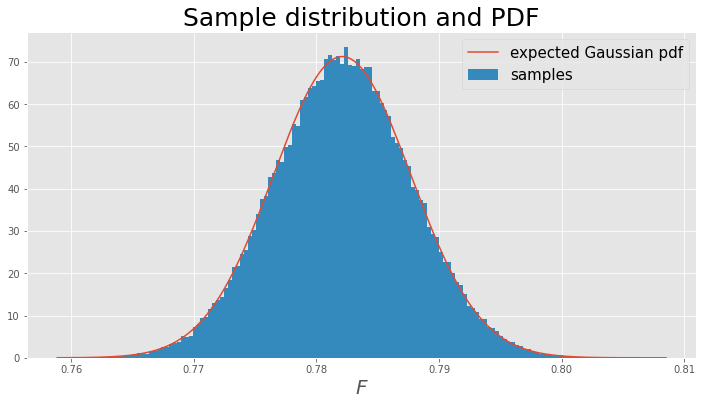

In [212]:
plt.figure(figsize=(12, 6))

xx = np.linspace(min(F_sample), max(F_sample), 1000)
plt.plot(xx, stats.norm.pdf(xx, F_value, delta_F_value), label='expected Gaussian pdf');
plt.hist(F_sample, bins='auto', density=True, label='samples');

plt.title('Sample distribution and PDF', fontsize=25, color='black')
plt.xlabel('$F$', fontsize=20)
plt.legend(fontsize=15, labelcolor='black', loc=0)
plt.show()

### (d)

In [213]:
values = {
    G  :       6.67430e-11,
    M_1:       40e4,
    delta_M_1: 2e4,
    M_2:       30e4,
    delta_M_2: 1e4,
    r  :       3.2,
    delta_r :  1.0
}

# посчитаем значаение F
F_value = F.evalf(subs=values)
F_value = round_to_n(float(F_value))

# посчитаем значаение погрешности F
delta_F_value = delta_F.evalf(subs=values)
delta_F_value = round_to_n(float(delta_F_value), 2)
delta_F_value

# в результате имеем
print(f'F = {F_value} ± {delta_F_value}')
print(f"relative error = {delta_F_value/F_value:.2%}")

F = 0.7821 ± 0.49
relative error = 62.65%


Относительная ошибка **КРАЙНЕ ВЕЛИКА** - 62% выглядит очень плохо.  
Очень большая погрешность у радиуса(он легко может стать почти 0), а учитывая, что на него происходит деление, мы скорее всего получим супер большие значения для F, что сразу же испортит визуализацию.  
К тому же теперь с легкостью можно получить отрицательные значения для массы и радиуса

In [214]:
%%time

M1_sample = get_gauss_sample(mu=values[M_1], sigma=values[delta_M_1])
M2_sample = get_gauss_sample(mu=values[M_2], sigma=values[delta_M_2])
r_sample  = get_gauss_sample(mu=values[r],   sigma=values[delta_r])

F_sample = []
for m1, m2, r_ in tqdm.tqdm(zip(M1_sample, M2_sample, r_sample)):
    F_sample.append(
        get_F(m1, m2, r_, values[G])
    )

100000it [00:00, 727628.27it/s]CPU times: user 416 ms, sys: 10.1 ms, total: 426 ms
Wall time: 452 ms



In [215]:
# видим очень большое стандартное отклонение
np.std(F_sample)

26143.97203489094

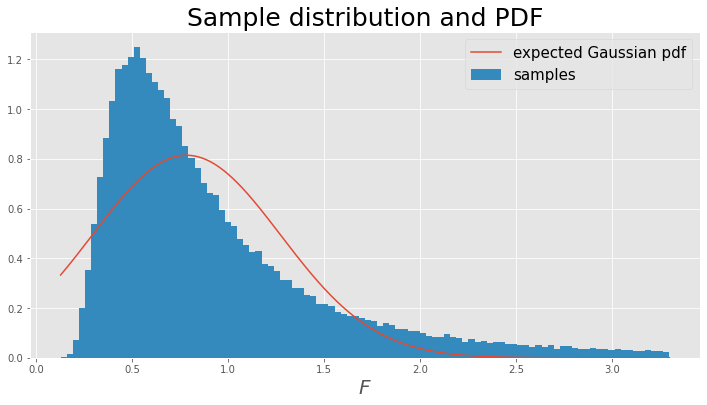

In [219]:
# как я писал выше -- без этого хака визулизация теряет смысл
# по сути мы выкинем сколько-то самых больших значений
values_to_drop = 5_000
F_sample.sort()

plt.figure(figsize=(12, 6))

xx = np.linspace(min(F_sample), max(F_sample[:-values_to_drop]), 500)
plt.plot(xx, stats.norm.pdf(xx, F_value, delta_F_value), label='expected Gaussian pdf');
plt.hist(F_sample[:-values_to_drop], bins=100, density=True, label='samples');

plt.title('Sample distribution and PDF', fontsize=25, color='black')
plt.xlabel('$F$', fontsize=20)
plt.legend(fontsize=15, labelcolor='black', loc=0)
plt.show()

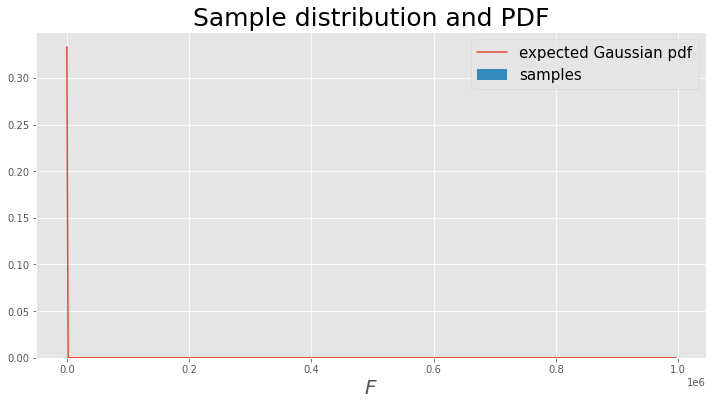

In [217]:
# если есть желание посмотреть на плохую визуализацию
values_to_drop = 1

plt.figure(figsize=(12, 6))

xx = np.linspace(min(F_sample), max(F_sample[:-values_to_drop]), 500)
plt.plot(xx, stats.norm.pdf(xx, F_value, delta_F_value), label='expected Gaussian pdf');
plt.hist(F_sample[:-values_to_drop], bins=100, density=True, label='samples');

plt.title('Sample distribution and PDF', fontsize=25, color='black')
plt.xlabel('$F$', fontsize=20)
plt.legend(fontsize=15, labelcolor='black', loc=0)
plt.show()